In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


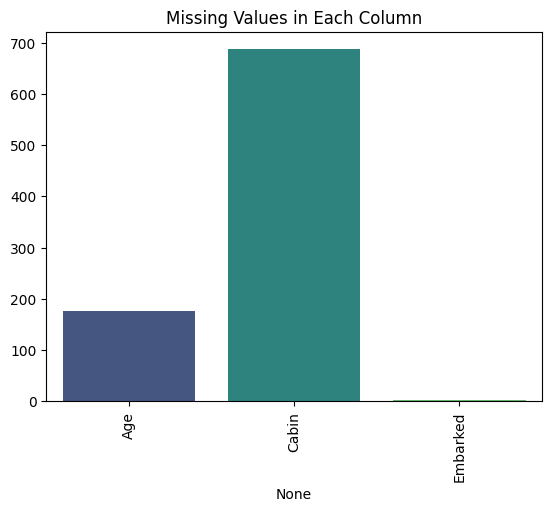

In [7]:
missing_values = train.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

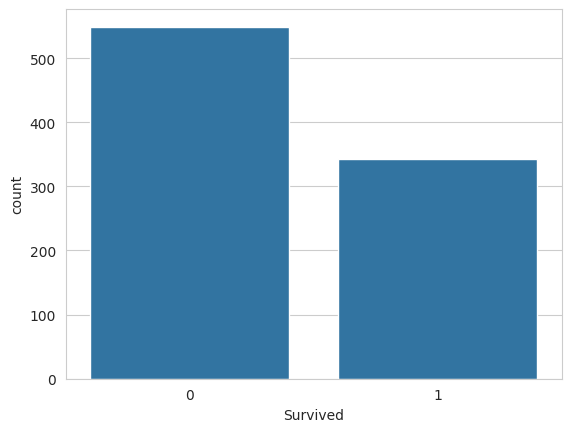

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived" , data = train)

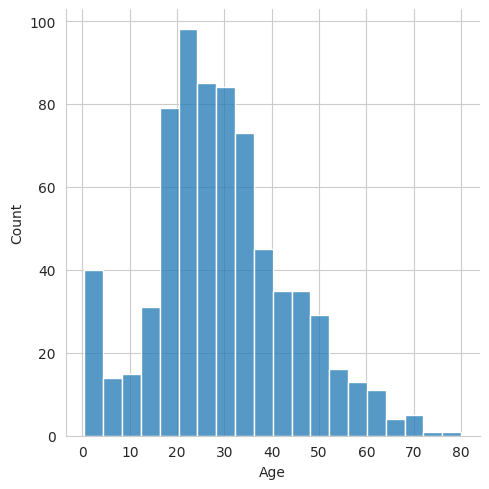

In [9]:
sns.displot(train["Age"].dropna() , kde = False , bins = 20)

<Axes: xlabel='Pclass', ylabel='Age'>

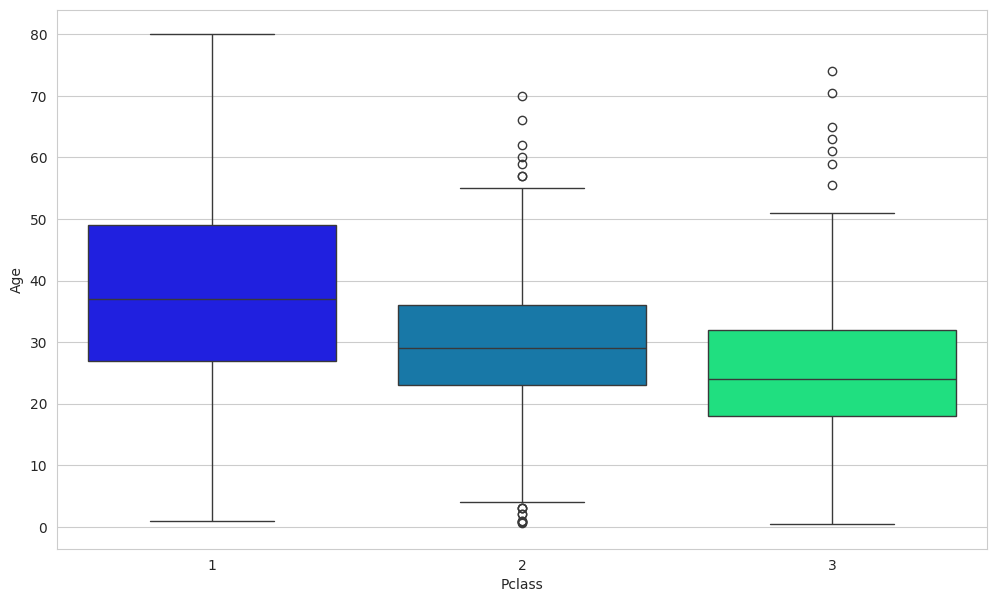

In [10]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass" , y= "Age" , data = train , palette = "winter", hue="Pclass", legend=False)

<Axes: xlabel='Survived', ylabel='count'>

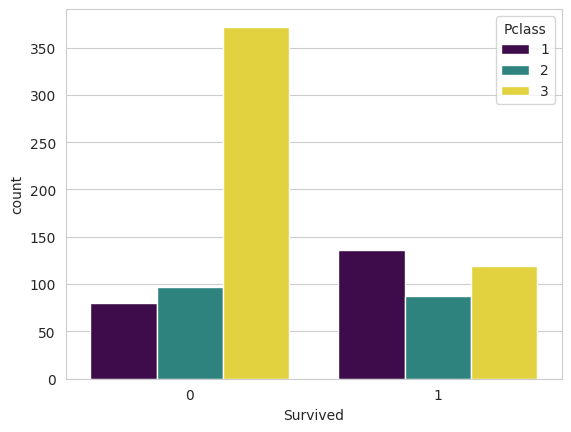

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue = "Pclass" , data = train , palette = "viridis")

<Axes: xlabel='Survived', ylabel='count'>

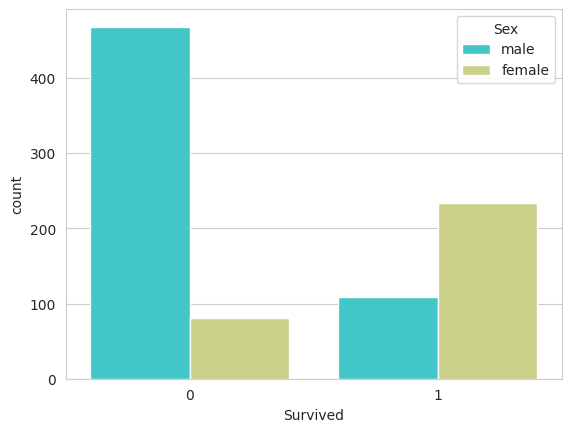

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue = "Sex" , data = train , palette = "rainbow")

<Axes: >

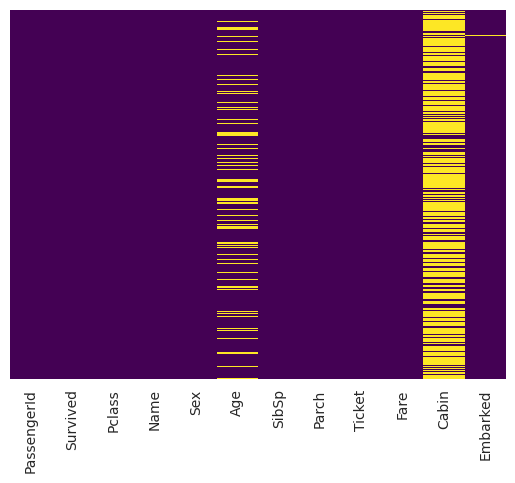

In [15]:
sns.heatmap(train.isnull() , yticklabels = False , cbar = False , cmap = "viridis"  )

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
pd.get_dummies(train["Embarked"],drop_first = True ) .head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [19]:

from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(data))

MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [20]:
sex = pd.get_dummies(train["Sex"] , drop_first = True)
embark = pd.get_dummies(train["Embarked"] , drop_first = True)

In [21]:
train.drop(["Sex","Embarked","Name","Ticket"],axis =1,inplace = True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [23]:
train = pd.concat([train , sex, embark] , axis =1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,True,False,True
1,2,1,1,38.0,1,0,71.2833,C85,False,False,False
2,3,1,3,26.0,0,0,7.9250,NaN,False,False,True
3,4,1,1,35.0,1,0,53.1000,C123,False,False,True
4,5,0,3,35.0,0,0,8.0500,NaN,True,False,True


In [25]:
train.drop("Survived" ,axis =1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,3,22.0,1,0,7.2500,NaN,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,False,False
2,3,3,26.0,0,0,7.9250,NaN,False,False,True
3,4,1,35.0,1,0,53.1000,C123,False,False,True
4,5,3,35.0,0,0,8.0500,NaN,True,False,True


In [27]:

numerical_stats = train.describe()
print("Numerical Statistics:\n", numerical_stats)

Numerical Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Text(0.5, 1.0, 'Age Distribution')

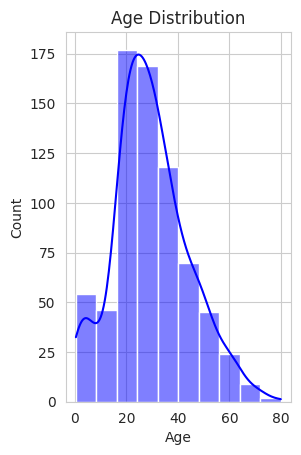

In [28]:
plt.subplot(1, 2, 1)
sns.histplot(train['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')

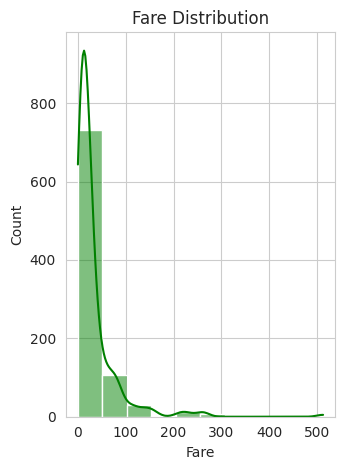

In [29]:
plt.subplot(1, 2, 2)
sns.histplot(train['Fare'], bins=10, kde=True, color='green')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

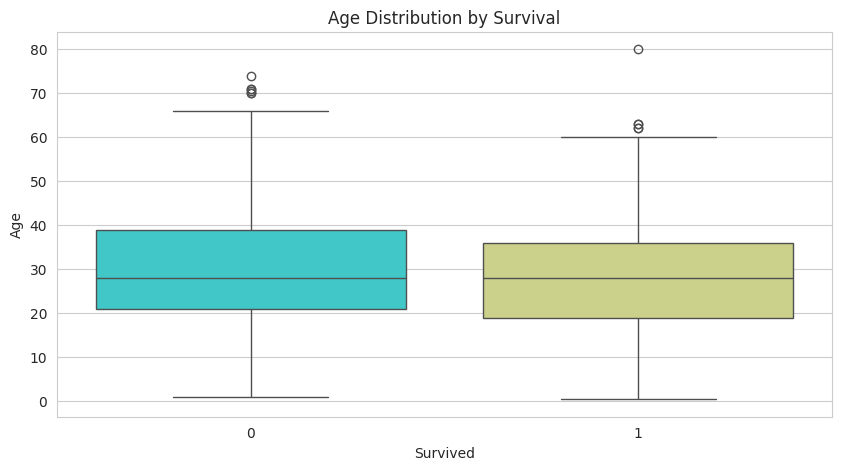

In [32]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=train, palette='rainbow')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()
